In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Features
* **longitude:**  geographic coordinate (district´s east-west position)
* **latitude:**  geographic coordinate (district´s north-south position)
* **housing_median_age:** median age of houses in district
* **total_rooms** Sum of all rooms in district
* **total_bedrooms** Sum of all bedrooms in district
* **population:** total population in district
* **households:** total households in district
* **median_income:** median household income in district 
* **median_house_value:** median house value in district
* **ocean_proximity:** District´s proximity to the ocean (categorical data)

In [4]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [5]:
#total_bedrooms - have missing values

df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
df[df['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [7]:
df[df.duplicated(keep=False)] #check if duplicated rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
df.total_bedrooms.value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

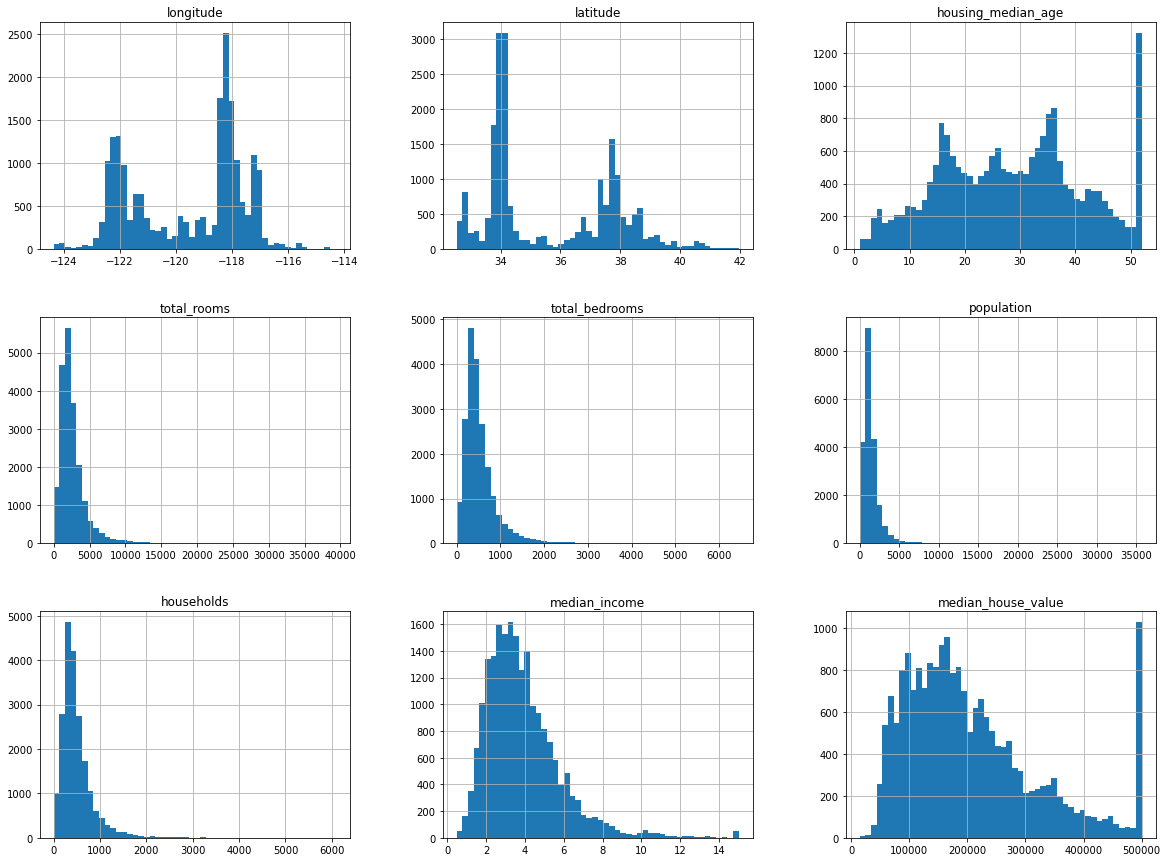

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show() #first inspection of data

## Data Cleaning + Additional Features

In [11]:
#either use median to replace missing value or drop 

207 / 20640

0.01002906976744186

In [12]:
#1% missing - below the 5% threshold hence can be removed 

df.dropna(inplace=True)

In [13]:
#rooms per household - new feature (total_rooms / households)

df['rooms_per_household'] = df['total_rooms'] / df['households']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [14]:
df['rooms_per_household'].nlargest(10)

1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
1912      56.269231
9676      52.848214
11707     52.690476
2395      50.837838
1240      47.515152
Name: rooms_per_household, dtype: float64

In [15]:
df.rooms_per_household.nsmallest(10)

5916     0.846154
8219     0.888889
3126     1.000000
14818    1.130435
17820    1.130435
4552     1.260870
4550     1.378486
4587     1.411290
4602     1.465753
12484    1.550409
Name: rooms_per_household, dtype: float64

- 2 extreme values within the 10 largest rooms_per_household (with over 20k observations, decide to keep the 2 extreme / suspicious values) - could further inspect
- inspect 1914, 5916 and 8219

In [16]:
df.loc[[1914,5916, 8219]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
1914,-120.10,38.91,33.0,1561.0,282.0,30.0,11.0,1.8750,500001.0,INLAND,141.909091
5916,-118.44,34.28,46.0,11.0,11.0,24.0,13.0,2.8750,162500.0,<1H OCEAN,0.846154
8219,-118.21,33.79,33.0,32.0,18.0,96.0,36.0,4.5938,112500.0,NEAR OCEAN,0.888889


In [17]:
df['pop_per_household'] = df.population / df.households

In [18]:
df['bedrooms_per_room'] = df.total_bedrooms / df.total_rooms

In [19]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,5.431344,3.071533,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,2.482946,10.438269,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.692308,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,4.441441,2.429032,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,5.230769,2.817582,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,6.052381,3.281513,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Identify features that impact home prices

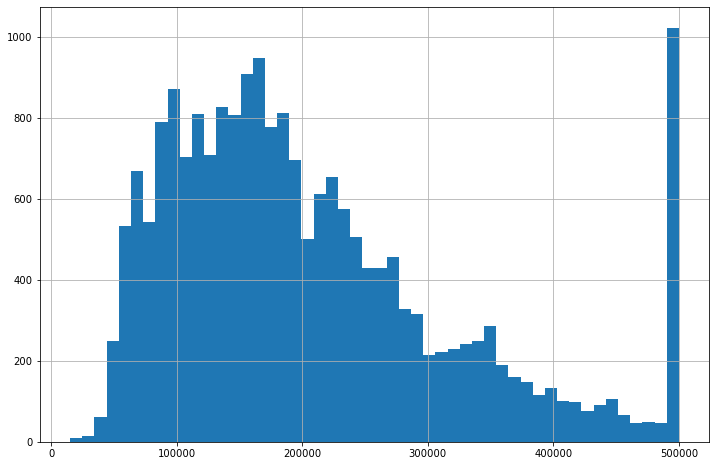

In [20]:
df.median_house_value.hist(bins=50, figsize=(12,8))
plt.show()

In [21]:
#linear relationship between house prices and features
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,pop_per_household,bedrooms_per_room
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,-0.027307,0.002304,0.092657
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,0.106423,0.002522,-0.113815
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.153031,0.013258,0.136089
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.133482,-0.024596,-0.187900
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.001538,-0.028355,0.084238
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.071898,0.070062,0.035319
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.080165,-0.027336,0.065087
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.325307,0.018894,-0.615661
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.151344,-0.023639,-0.255880
rooms_per_household,-0.027307,0.106423,-0.153031,0.133482,0.001538,-0.071898,-0.080165,0.325307,0.151344,1.000000,-0.004873,-0.416952


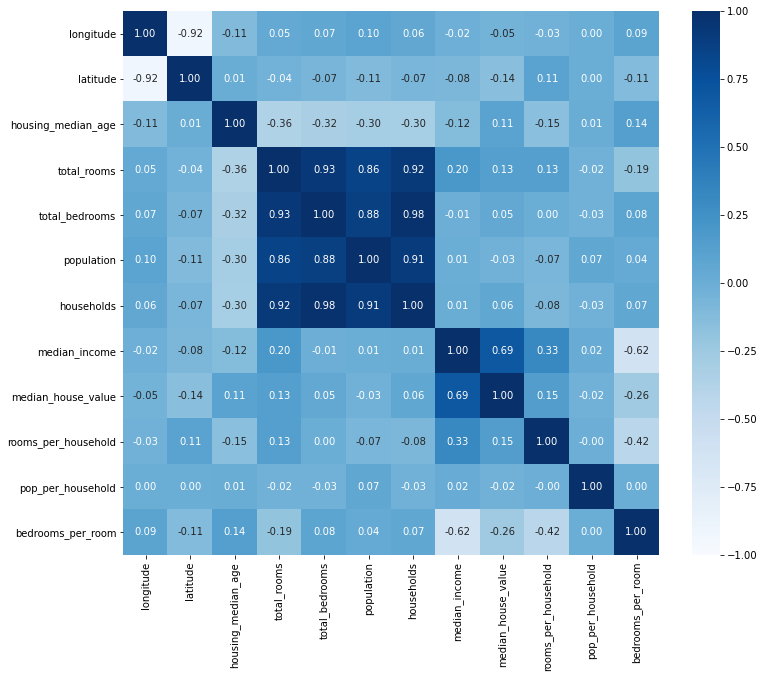

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.show()

In [23]:
df.corr()['median_house_value'].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688355
rooms_per_household    0.151344
total_rooms            0.133294
housing_median_age     0.106432
households             0.064894
total_bedrooms         0.049686
pop_per_household     -0.023639
population            -0.025300
longitude             -0.045398
latitude              -0.144638
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

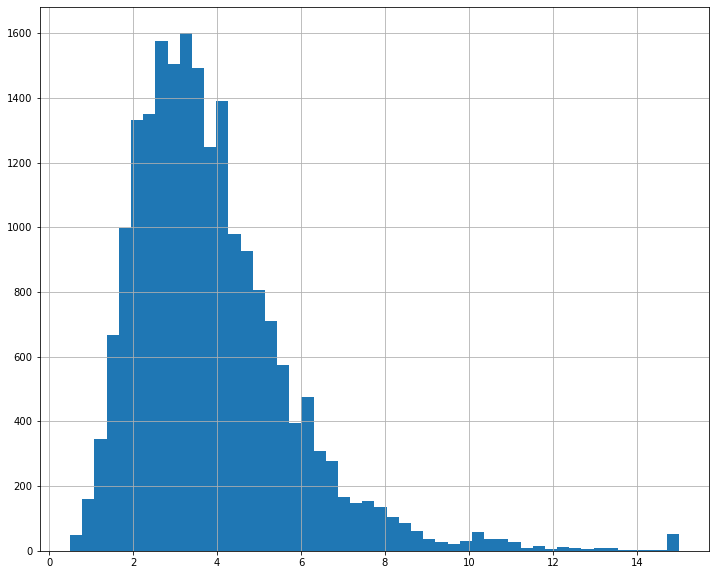

In [24]:
df.median_income.hist(bins=50, figsize=(12,10))
plt.show()

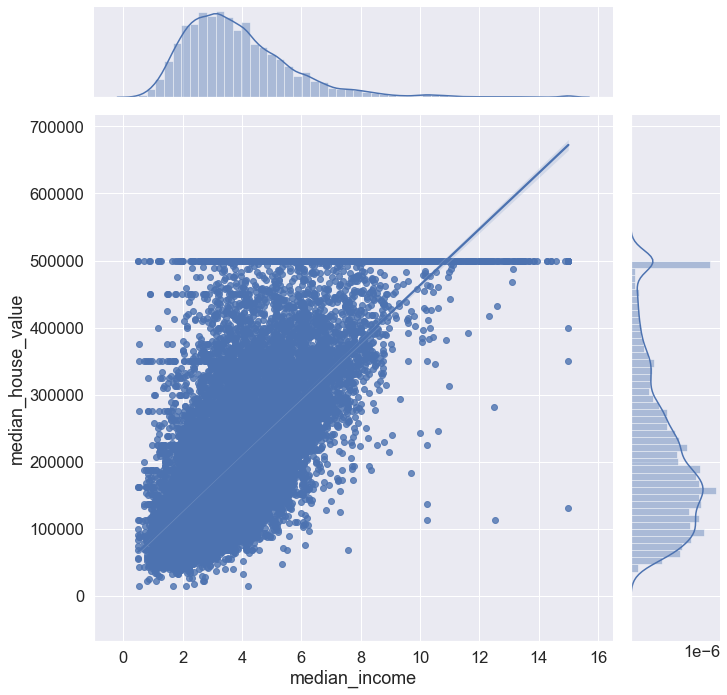

In [25]:
sns.set(font_scale=1.5)
sns.jointplot(df['median_income'], df['median_house_value'], height=10, kind='reg')
plt.show()

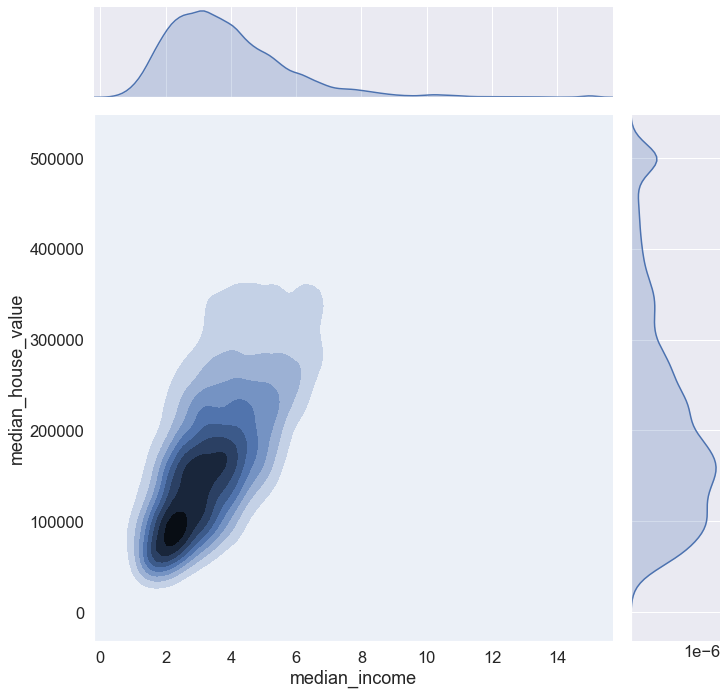

In [26]:
sns.set(font_scale=1.5)
sns.jointplot(df['median_income'], df['median_house_value'], height=10, kind='kde')
plt.show()

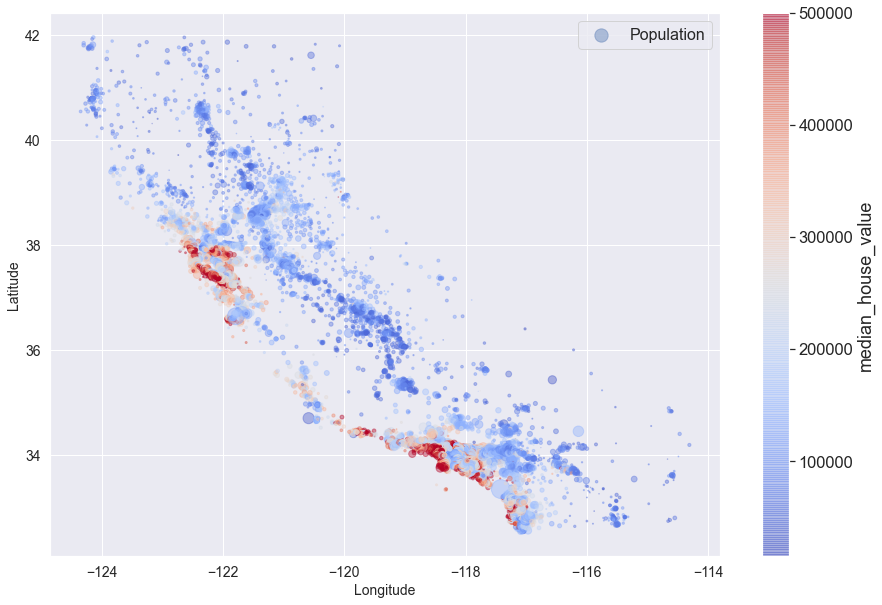

In [27]:
df.plot(kind='scatter', x='longitude', y='latitude', cmap='coolwarm', c='median_house_value', s=df['population']/100, figsize=(15,10), alpha=0.4, sharex=False, label='Population', fontsize=14)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [28]:
import matplotlib.image as mpimg
cali_img = mpimg.imread('california.png')

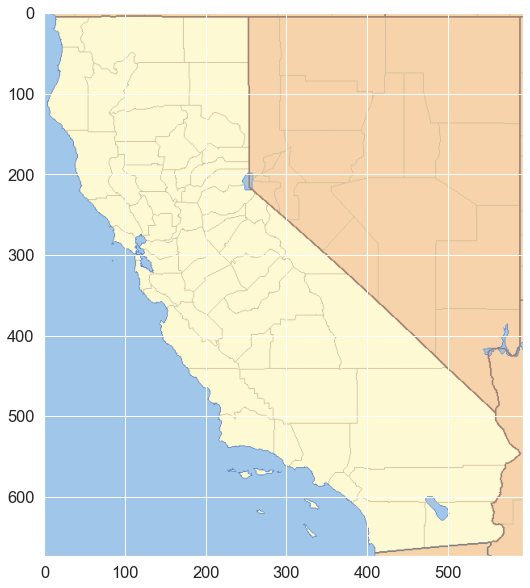

In [29]:
plt.figure(figsize=(15,10))
plt.imshow(cali_img)
plt.show()

In [30]:
#apply the scatter plot to the cali map image 

cali_img

array([[[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667],
        [0.9647059, 0.827451 , 0.6666667]],

       ...,

       [[0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        [0.627451 , 0.7764706, 0.9137255],
        ...,
        [0.9647059, 0.8274

In [31]:
df.latitude.min()

32.54

In [32]:
df.latitude.max()

41.95

In [33]:
df.longitude.min()

-124.35

In [34]:
df.longitude.max()

-114.31

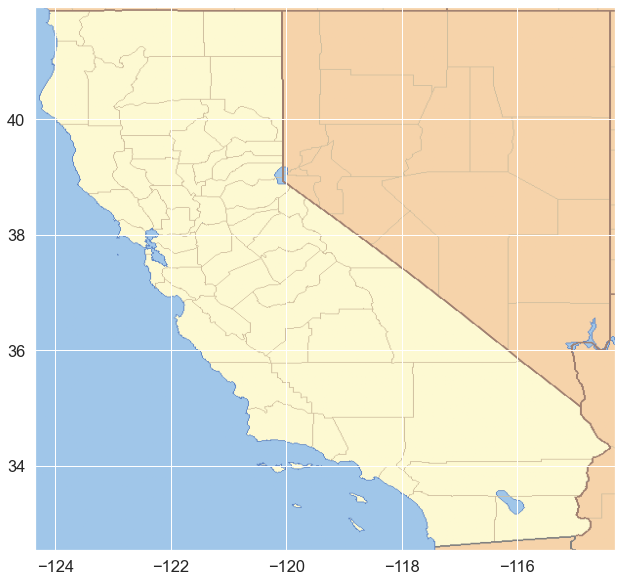

In [35]:
plt.figure(figsize=(15,10))
plt.imshow(cali_img, extent=[-124.35,-114.31, 32.54, 41.95])
plt.show()

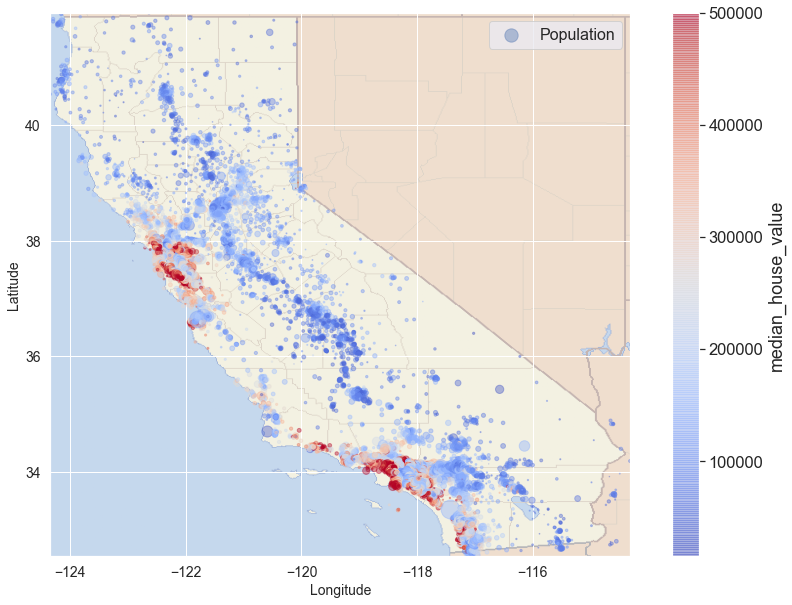

In [36]:
df.plot(kind='scatter', x='longitude',y='latitude', s=df.population/100, label='Population', cmap='coolwarm', alpha=0.4, sharex=False, fontsize=14, colorbar=True, c='median_house_value', figsize=(15,10))
plt.imshow(cali_img, extent=[-124.35,-114.31, 32.54, 41.95], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

In [37]:
prox = df.ocean_proximity.unique()
prox

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [38]:
df.loc[df['ocean_proximity']==prox[3]]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,pop_per_household,bedrooms_per_room
1850,-124.17,41.80,16.0,2739.0,480.0,1259.0,436.0,3.7557,109400.0,NEAR OCEAN,6.282110,2.887615,0.175246
1851,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0,NEAR OCEAN,5.589958,2.715481,0.206587
1852,-124.23,41.75,11.0,3159.0,616.0,1343.0,479.0,2.4805,73200.0,NEAR OCEAN,6.594990,2.803758,0.194998
1853,-124.21,41.77,17.0,3461.0,722.0,1947.0,647.0,2.5795,68400.0,NEAR OCEAN,5.349304,3.009274,0.208610
1854,-124.19,41.78,15.0,3140.0,714.0,1645.0,640.0,1.6654,74600.0,NEAR OCEAN,4.906250,2.570312,0.227389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20380,-118.83,34.14,16.0,1316.0,194.0,450.0,173.0,10.1597,500001.0,NEAR OCEAN,7.606936,2.601156,0.147416
20381,-118.83,34.14,16.0,1956.0,312.0,671.0,319.0,6.4001,321800.0,NEAR OCEAN,6.131661,2.103448,0.159509
20423,-119.00,34.08,17.0,1822.0,438.0,578.0,291.0,5.4346,428600.0,NEAR OCEAN,6.261168,1.986254,0.240395
20424,-118.75,34.18,4.0,16704.0,2704.0,6187.0,2207.0,6.6122,357600.0,NEAR OCEAN,7.568645,2.803353,0.161877


In [39]:
df_loc = df.loc[df['ocean_proximity']==prox[3]]

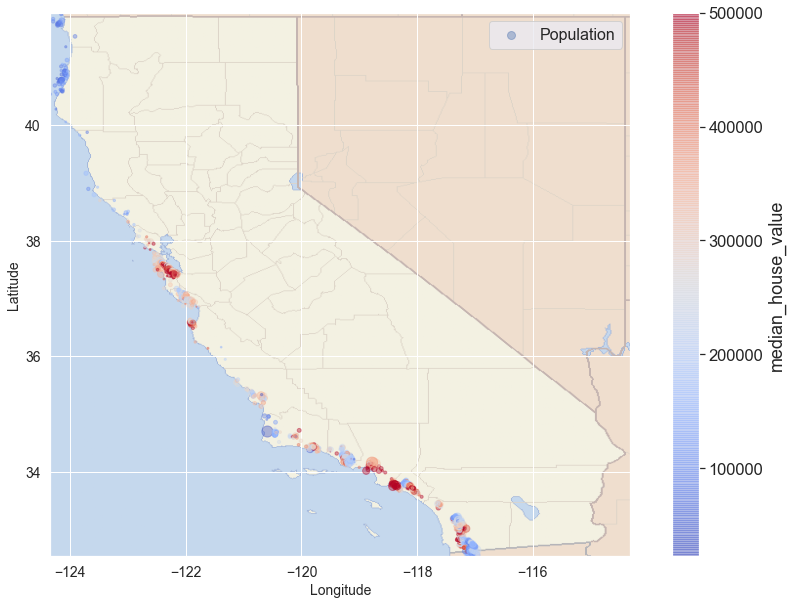

In [40]:
df_loc.plot(kind='scatter', x='longitude',y='latitude', s=df_loc.population/100, label='Population', cmap='coolwarm', alpha=0.4, sharex=False, fontsize=14, colorbar=True, c='median_house_value', figsize=(15,10))
plt.imshow(cali_img, extent=[-124.35,-114.31, 32.54, 41.95], alpha=0.5, cmap=plt.get_cmap("jet"))
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.legend(fontsize=16)
plt.show()

Relationship between latitude (longitude) and house prices but no linear relationship
- location matters
- within non linear ML like random forest, can capture relationship between location and house prices 